In [1]:
import pandas as pd

df = pd.read_csv("data.csv")
df.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 79780: invalid start byte

In [2]:
import pandas as pd
import chardet

# Step 1: Detect encoding
with open("data.csv", "rb") as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']
    print(f"Detected encoding: {encoding}")

# Step 2: Read CSV with detected encoding
df = pd.read_csv("data.csv", encoding=encoding)

df.head()

Detected encoding: ISO-8859-1


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
import pandas as pd
import chardet

# Step 1: Detect file encoding
with open("data.csv", "rb") as f:
    result = chardet.detect(f.read())
encoding = result['encoding']
print(f"Detected encoding: {encoding}")

# Step 2: Try common separators
separators = [',', ';', '\t', '|']
for sep in separators:
    try:
        df = pd.read_csv("data.csv", encoding=encoding, sep=sep, on_bad_lines='skip')
        if df.shape[1] >= 5:  # reasonable number of columns
            print(f"Using separator: '{sep}'")
            break
    except Exception as e:
        continue

# Step 3: Show columns and first 10 rows
print("Columns:", df.columns.tolist())
print(df.head(10))

Detected encoding: ISO-8859-1
Using separator: ','
Columns: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

      InvoiceDate  UnitPrice  CustomerID

In [5]:
import pandas as pd

# Step 1: Load CSV
file_path = 'data.csv'  # Change this if your file is in a different folder
dt = pd.read_csv(file_path, encoding='ISO-8859-1', sep=',')

# Step 2: Quick look at the data
print("First 10 rows:")
print(dt.head(10))

# Step 3: Column info and data types
print("\nData info:")
print(dt.info())

# Step 4: Basic statistics for numeric columns
print("\nBasic statistics:")
print(dt.describe())

# Step 5: Check for missing values
print("\nMissing values per column:")
print(dt.isnull().sum())

# Step 6: Convert columns to appropriate types
# Convert InvoiceDate to datetime
dt['InvoiceDate'] = pd.to_datetime(dt['InvoiceDate'], errors='coerce')

# Convert Quantity and UnitPrice to numeric
dt['Quantity'] = pd.to_numeric(dt['Quantity'], errors='coerce')
dt['UnitPrice'] = pd.to_numeric(dt['UnitPrice'], errors='coerce')

# Step 7: Create Revenue column
dt['Revenue'] = dt['Quantity'] * dt['UnitPrice']

print("\nData loaded and cleaned. Sample with Revenue:")
print(dt.head(10))

First 10 rows:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:

In [6]:
top_products = dt.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top 10 products by quantity sold:")
print(top_products)

Top 10 products by quantity sold:
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
JUMBO BAG RED RETROSPOT               47363
ASSORTED COLOUR BIRD ORNAMENT         36381
POPCORN HOLDER                        36334
PACK OF 72 RETROSPOT CAKE CASES       36039
WHITE HANGING HEART T-LIGHT HOLDER    35317
RABBIT NIGHT LIGHT                    30680
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26315
PACK OF 60 PINK PAISLEY CAKE CASES    24753
Name: Quantity, dtype: int64


In [7]:
dt['Month'] = dt['InvoiceDate'].dt.to_period('M')
monthly_sales = dt.groupby('Month')['Quantity'].sum()
print("\nSales per month:")
print(monthly_sales)


Sales per month:
Month
2010-12    342228
2011-01    308966
2011-02    277989
2011-03    351872
2011-04    289098
2011-05    380391
2011-06    341623
2011-07    391116
2011-08    406199
2011-09    549817
2011-10    570532
2011-11    740286
2011-12    226333
Freq: M, Name: Quantity, dtype: int64


In [8]:
total_revenue = dt['Revenue'].sum()
print("\nTotal Revenue:", total_revenue)

top_revenue_products = dt.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 products by revenue:")
print(top_revenue_products)


Total Revenue: 9747747.934

Top 10 products by revenue:
Description
DOTCOM POSTAGE                        206245.48
REGENCY CAKESTAND 3 TIER              164762.19
WHITE HANGING HEART T-LIGHT HOLDER     99668.47
PARTY BUNTING                          98302.98
JUMBO BAG RED RETROSPOT                92356.03
RABBIT NIGHT LIGHT                     66756.59
POSTAGE                                66230.64
PAPER CHAIN KIT 50'S CHRISTMAS         63791.94
ASSORTED COLOUR BIRD ORNAMENT          58959.73
CHILLI LIGHTS                          53768.06
Name: Revenue, dtype: float64


In [9]:
top_countries = dt.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 countries by revenue:")
print(top_countries)


Top 10 countries by revenue:
Country
United Kingdom    8187806.364
Netherlands        284661.540
EIRE               263276.820
Germany            221698.210
France             197403.900
Australia          137077.270
Switzerland         56385.350
Spain               54774.580
Belgium             40910.960
Sweden              36595.910
Name: Revenue, dtype: float64


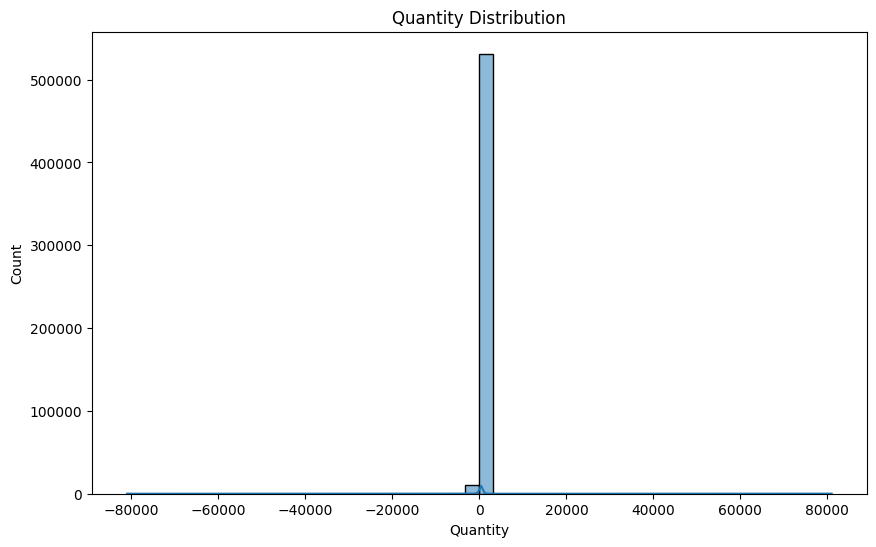

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(dt['Quantity'], bins=50, kde=True)
plt.title("Quantity Distribution")
plt.show()


Top 10 countries by revenue:
Country
United Kingdom    8187806.364
Netherlands        284661.540
EIRE               263276.820
Germany            221698.210
France             197403.900
Australia          137077.270
Switzerland         56385.350
Spain               54774.580
Belgium             40910.960
Sweden              36595.910
Name: Revenue, dtype: float64


C:\Users\well\AppData\Local\Temp\ipykernel_11440\257739186.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


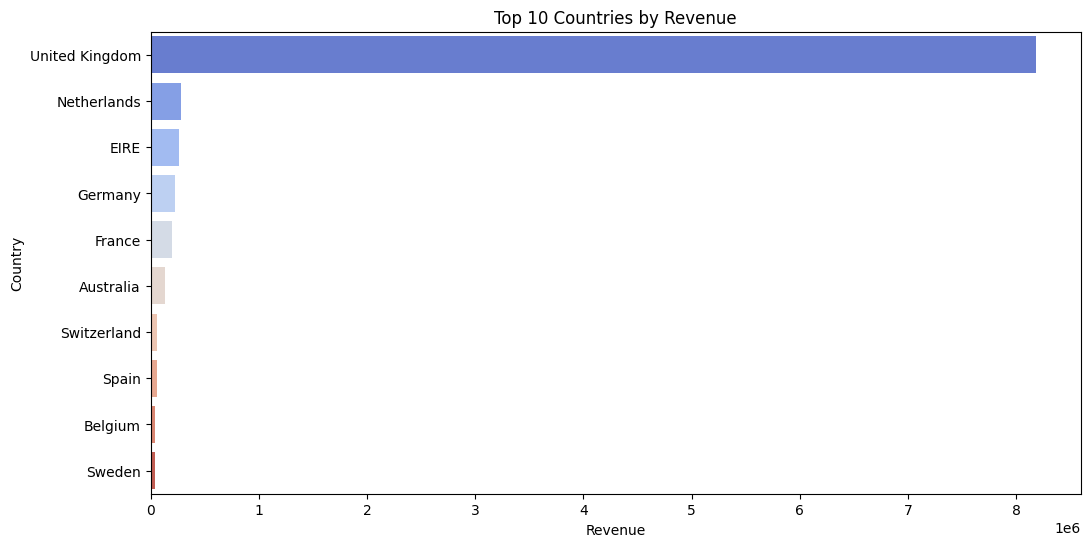

In [11]:
top_countries = dt.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 countries by revenue:")
print(top_countries)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Country")
plt.show()

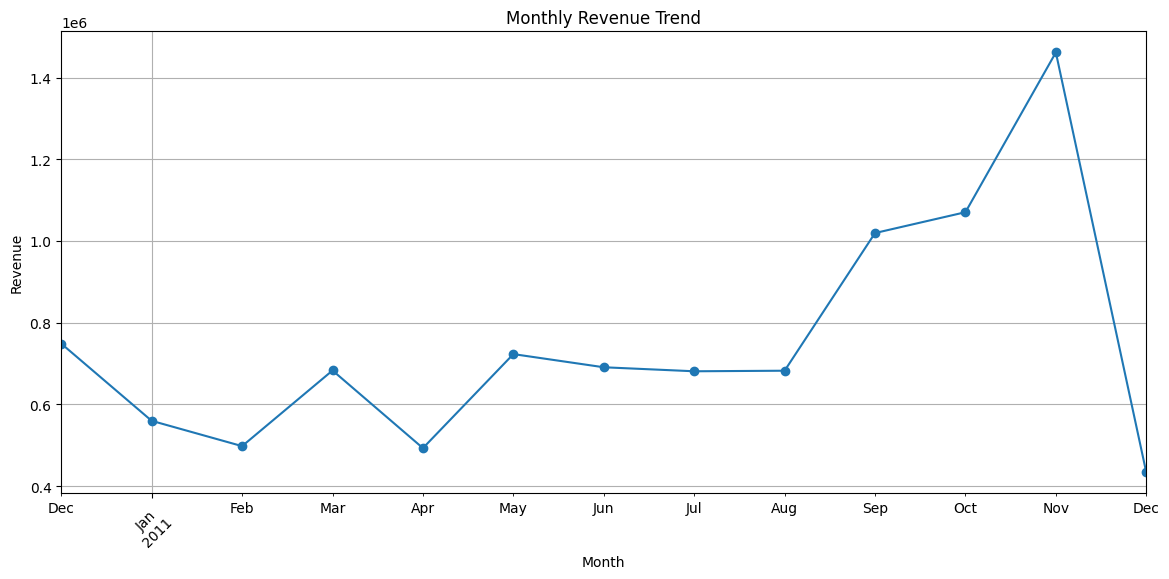

In [12]:
monthly_revenue = dt.groupby('Month')['Revenue'].sum()

plt.figure(figsize=(14,6))
monthly_revenue.plot(kind='line', marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# EDA Summary – E-Commerce Dataset

*Project Overview:*  
This notebook analyzes an e-commerce dataset to understand product sales, revenue trends, and customer behavior.

*Key Findings:*
1. *Top Products:* Identified the top 10 products by quantity sold and revenue.  
2. *Monthly Trends:* Analyzed monthly sales and revenue to observe seasonal patterns.  
3. *Revenue Insights:* Calculated total revenue and highlighted the highest-earning products.  
4. *Country Analysis:* Determined the top 10 countries contributing most to revenue.  
5. *Quantity Distribution:* Visualized the distribution of product quantities to understand purchase behavior.  
6. *Cleaned Dataset:* Created a Revenue column and cleaned data for further analysis.

Top 10 Products by Quantity Sold:
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53215
JUMBO BAG RED RETROSPOT               45066
ASSORTED COLOUR BIRD ORNAMENT         35314
WHITE HANGING HEART T-LIGHT HOLDER    34147
PACK OF 72 RETROSPOT CAKE CASES       33409
POPCORN HOLDER                        30504
RABBIT NIGHT LIGHT                    27094
MINI PAINT SET VINTAGE                25880
PACK OF 12 LONDON TISSUES             25321
PACK OF 60 PINK PAISLEY CAKE CASES    24163
Name: Quantity, dtype: int64

Top 10 Products by Revenue:
Description
REGENCY CAKESTAND 3 TIER              132870.40
WHITE HANGING HEART T-LIGHT HOLDER     93823.85
JUMBO BAG RED RETROSPOT                83236.76
PARTY BUNTING                          67687.53
POSTAGE                                66710.24
ASSORTED COLOUR BIRD ORNAMENT          56499.22
RABBIT NIGHT LIGHT                     51137.80
CHILLI LIGHTS                          45936.81
PAPER CHAIN KIT 50'S CHRISTMAS         41500.48
PICNIC BASKE

C:\Users\well\AppData\Local\Temp\ipykernel_11440\2105854891.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


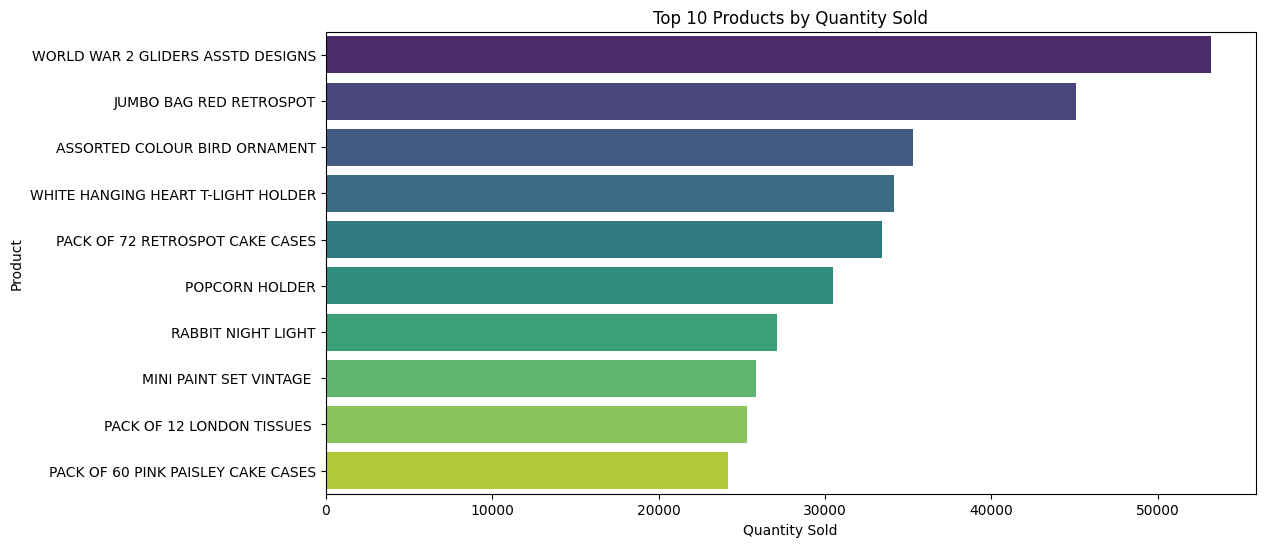

C:\Users\well\AppData\Local\Temp\ipykernel_11440\2105854891.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_revenue_products.values, y=top_revenue_products.index, palette='magma')


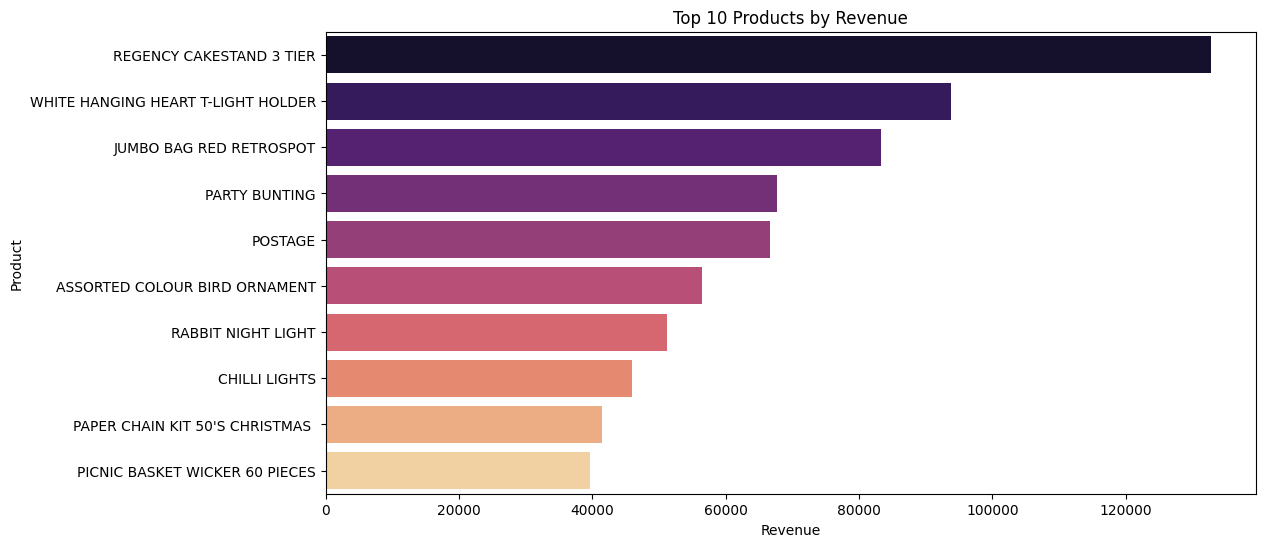

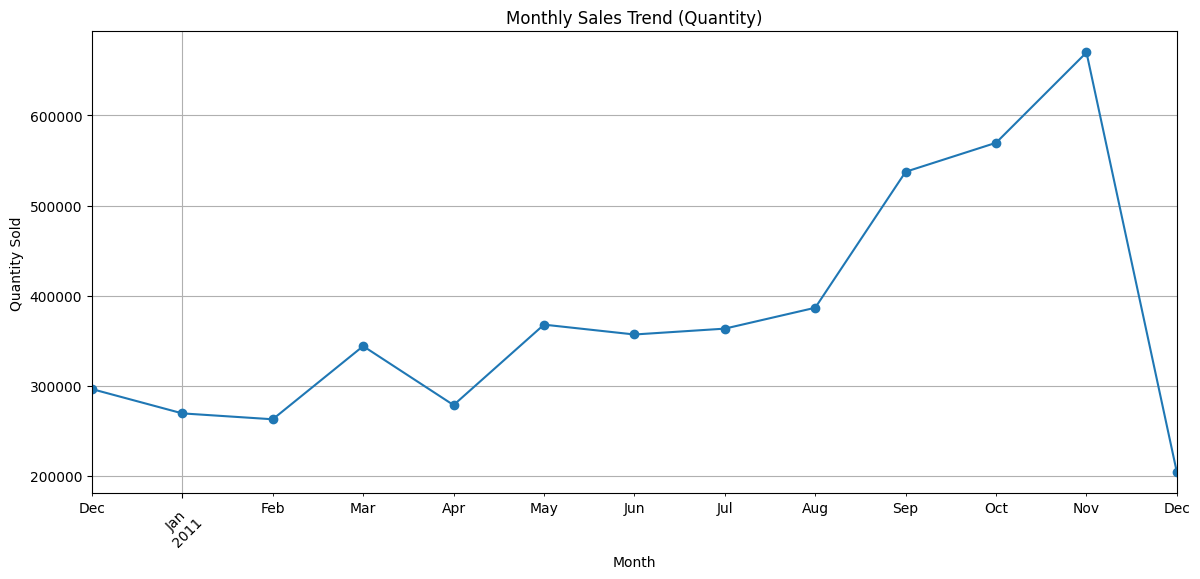

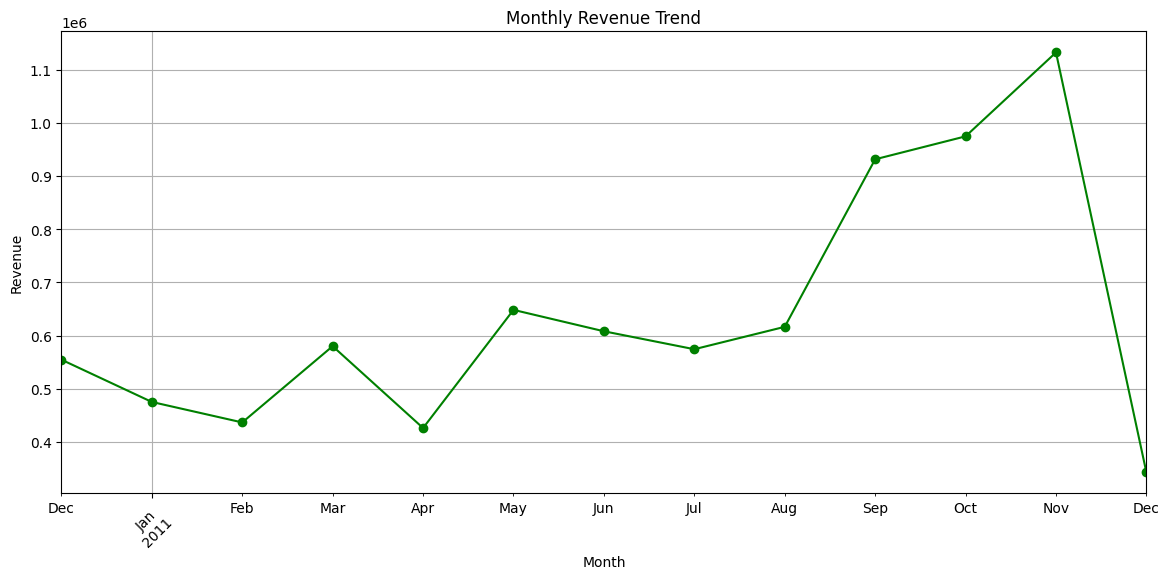

C:\Users\well\AppData\Local\Temp\ipykernel_11440\2105854891.py:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


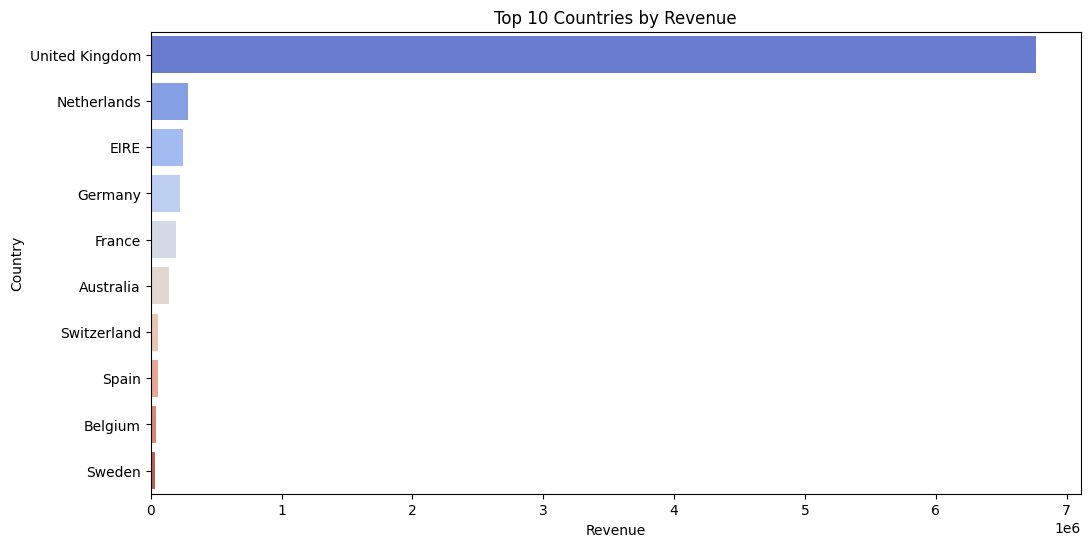

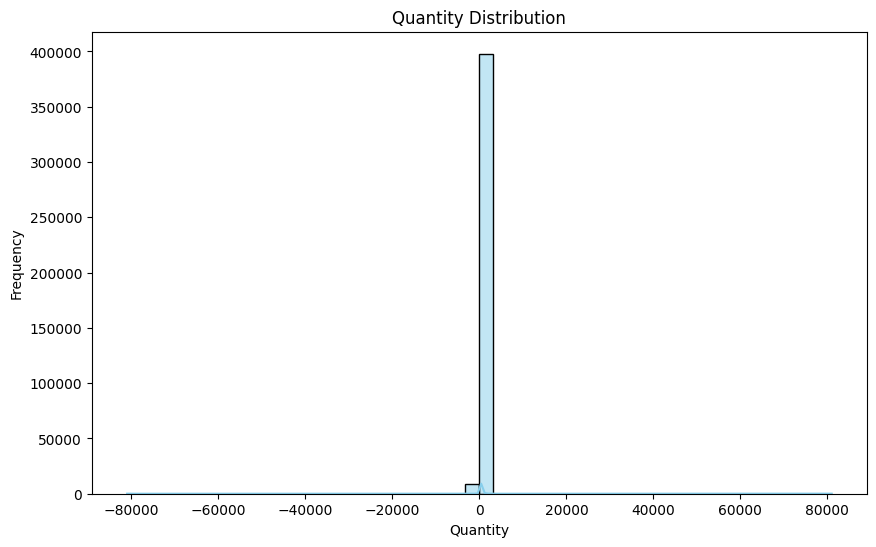


EDA Summary Table:
                                   Top_Products_Quantity Top_Products_Revenue
Description                                                                  
ASSORTED COLOUR BIRD ORNAMENT                    35314.0             56499.22
CHILLI LIGHTS                                                        45936.81
JUMBO BAG RED RETROSPOT                          45066.0             83236.76
MINI PAINT SET VINTAGE                           25880.0                     
PACK OF 12 LONDON TISSUES                        25321.0                     
PACK OF 60 PINK PAISLEY CAKE CASES               24163.0                     
PACK OF 72 RETROSPOT CAKE CASES                  33409.0                     
PAPER CHAIN KIT 50'S CHRISTMAS                                       41500.48
PARTY BUNTING                                                        67687.53
PICNIC BASKET WICKER 60 PIECES                                        39619.5
POPCORN HOLDER                              

In [13]:
# ----------------------------------------
# E-Commerce Data EDA - Complete Notebook
# ----------------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# Step 1: Load CSV
# -------------------------------
file_path = 'data.csv'  # Adjust path if needed
dt = pd.read_csv(file_path, encoding='ISO-8859-1', sep=',')

# -------------------------------
# Step 2: Clean Data
# -------------------------------
# Drop rows without CustomerID
dt = dt.dropna(subset=['CustomerID'])

# Convert numeric columns
dt['Quantity'] = pd.to_numeric(dt['Quantity'], errors='coerce')
dt['UnitPrice'] = pd.to_numeric(dt['UnitPrice'], errors='coerce')

# Convert InvoiceDate to datetime
dt['InvoiceDate'] = pd.to_datetime(dt['InvoiceDate'], errors='coerce')

# Create Revenue column
dt['Revenue'] = dt['Quantity'] * dt['UnitPrice']

# -------------------------------
# Step 3: Top Products by Quantity
# -------------------------------
top_products = dt.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top 10 Products by Quantity Sold:")
print(top_products)

# -------------------------------
# Step 4: Top Products by Revenue
# -------------------------------
top_revenue_products = dt.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Products by Revenue:")
print(top_revenue_products)

# -------------------------------
# Step 5: Monthly Sales Trend
# -------------------------------
dt['Month'] = dt['InvoiceDate'].dt.to_period('M')
monthly_sales = dt.groupby('Month')['Quantity'].sum()
print("\nMonthly Sales (Quantity):")
print(monthly_sales)

monthly_revenue = dt.groupby('Month')['Revenue'].sum()
print("\nMonthly Revenue:")
print(monthly_revenue)

# -------------------------------
# Step 6: Top Countries by Revenue
# -------------------------------
top_countries = dt.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Countries by Revenue:")
print(top_countries)

# -------------------------------
# Step 7: Visualizations
# -------------------------------
# Top 10 products by quantity
plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Quantity Sold")
plt.ylabel("Product")
plt.show()

# Top 10 products by revenue
plt.figure(figsize=(12,6))
sns.barplot(x=top_revenue_products.values, y=top_revenue_products.index, palette='magma')
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product")
plt.show()

# Monthly sales trend
plt.figure(figsize=(14,6))
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend (Quantity)")
plt.xlabel("Month")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Monthly revenue trend
plt.figure(figsize=(14,6))
monthly_revenue.plot(kind='line', marker='o', color='green')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Top 10 countries by revenue
plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Country")
plt.show()

# Quantity distribution
plt.figure(figsize=(10,6))
sns.histplot(dt['Quantity'], bins=50, kde=True, color='skyblue')
plt.title("Quantity Distribution")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()

# -------------------------------
# Step 8: Optional Summary Table
# -------------------------------
eda_summary = pd.DataFrame({
    'Top_Products_Quantity': top_products,
    'Top_Products_Revenue': top_revenue_products
}).fillna('')
print("\nEDA Summary Table:")
print(eda_summary)

# -------------------------------
# Step 9: Optional: Save Cleaned Data
# -------------------------------
dt.to_csv("data_cleaned.csv", index=False)
print("\nCleaned dataset saved as 'data_cleaned.csv'")